# Progetto Corò Elia

In [1]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')
data

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1.0
3956,ffa9794a,Winter,10,0,NaN,NaN,Spring,18.764678,53.5,76.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Winter,0.0,NaN
3957,ffcd4dbd,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1.0
3958,ffed1dd5,Spring,13,0,Spring,70.0,Winter,12.235895,70.7,87.0,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0.0


## Data Initial Cleaning

In [3]:
import pandas as pd
from cleaning.remove_high_missing_fields import remove_high_missing_fields
from cleaning.remove_high_missing_columns import remove_high_missing_columns

# Reload dataset
data = pd.read_csv('train.csv')

# Removed columns which are not present in the test set
test_columns = list(pd.read_csv('test.csv').columns) + ['sii']
data = data[test_columns]

# Removed id column
data = data.drop(columns=['id'])

# Removed columns with more than 50% missing values
#data, column = remove_high_missing_columns(data, threshold=0.50)
#print("column removed " + str(len(column)))

# Removed rows where sii is invalid
data = data[data['sii'].notna()]

# Removed rows with more than 80% missing values
data, data_removed = remove_high_missing_fields(data, threshold=0.9)
print("row removed " + str(len(data_removed)))
print(len(data))

data
X = data.copy


row removed 0
2736


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def standardize_dataframe(df):
    # Seleziona solo le colonne numeriche del DataFrame
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    numeric_columns = [col for col in numeric_columns if col != 'sii']

    
    # Crea uno scaler
    scaler = StandardScaler()
    
    # Applica la standardizzazione alle colonne numeriche
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df

#data = standardize_dataframe(data)
data


,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,...,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,3.0,2.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,...,NaN,NaN,Fall,2.340,Fall,46.0,64.0,Summer,0.0,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,...,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0,0.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,...,NaN,NaN,Winter,2.451,Summer,31.0,45.0,Winter,0.0,1.0
5,Spring,13,1,Winter,50.0,Summer,22.279952,59.5,112.2,NaN,...,NaN,NaN,Spring,4.110,Summer,40.0,56.0,Spring,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,Fall,8,0,NaN,NaN,Fall,17.139810,52.5,67.2,25.0,...,NaN,NaN,Fall,3.440,Fall,41.0,58.0,Fall,2.0,0.0
3954,Summer,7,1,NaN,NaN,Summer,13.927006,48.5,46.6,23.0,...,NaN,NaN,NaN,NaN,Summer,48.0,67.0,Summer,0.0,1.0
3955,Fall,13,0,Spring,60.0,Fall,16.362460,59.5,82.4,NaN,...,NaN,NaN,Winter,3.260,Winter,35.0,50.0,Fall,1.0,1.0
3957,Fall,11,0,Spring,68.0,Winter,21.441500,60.0,109.8,NaN,...,NaN,NaN,Winter,2.729,Winter,56.0,77.0,Fall,0.0,1.0


In [5]:
from cleaning.one_hot_encoder import OneHotEncoderFunction

data = OneHotEncoderFunction(data)
data


,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,...,PAQ_C-Season_Winter,PAQ_C-Season_nan,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS-Season_nan,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,PreInt_EduHx-Season_nan
0,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.061430,9.21377,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.211720,3.97085,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.220330,18.82430,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.498800,67.97150,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.0,3.20303,17.1417,1035.270,1759.96,11.00630,52.5331,13.4004,3.741300,14.66690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3954,1.0,2.36680,13.6457,966.287,1256.17,9.98802,45.1853,13.2315,0.414263,1.41470,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3955,3.0,4.52277,16.3642,1206.880,2051.70,19.46110,70.8117,14.0629,2.301380,11.58830,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3957,2.0,4.41305,21.4438,1253.740,2005.99,20.48250,75.8033,14.8043,6.639520,33.99670,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.experimental import enable_iterative_imputer
from cleaning.fill_missing_values import fill_missing_values

data = fill_missing_values(data)

data

,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,...,PAQ_C-Season_Winter,PAQ_C-Season_nan,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,SDS-Season_nan,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter,PreInt_EduHx-Season_nan
0,2.00,2.668550,16.879200,932.4980,1492.0000,8.255980,41.586200,13.817700,3.061430,9.213770,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2.00,2.579490,14.037100,936.6560,1498.6500,6.019930,42.029100,12.825400,1.211720,3.970850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.22,4.175217,16.641878,1236.9793,1954.3359,20.683582,74.024262,14.355575,2.552481,11.824533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.00,3.841910,18.294300,1131.4300,1923.4400,15.592500,62.775700,14.074000,4.220330,18.824300,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2.00,4.330360,30.186500,1330.9700,1996.4500,30.212400,84.028500,16.687700,13.498800,67.971500,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3953,3.00,3.203030,17.141700,1035.2700,1759.9600,11.006300,52.533100,13.400400,3.741300,14.666900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3954,1.00,2.366800,13.645700,966.2870,1256.1700,9.988020,45.185300,13.231500,0.414263,1.414700,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3955,3.00,4.522770,16.364200,1206.8800,2051.7000,19.461100,70.811700,14.062900,2.301380,11.588300,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3957,2.00,4.413050,21.443800,1253.7400,2005.9900,20.482500,75.803300,14.804300,6.639520,33.996700,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


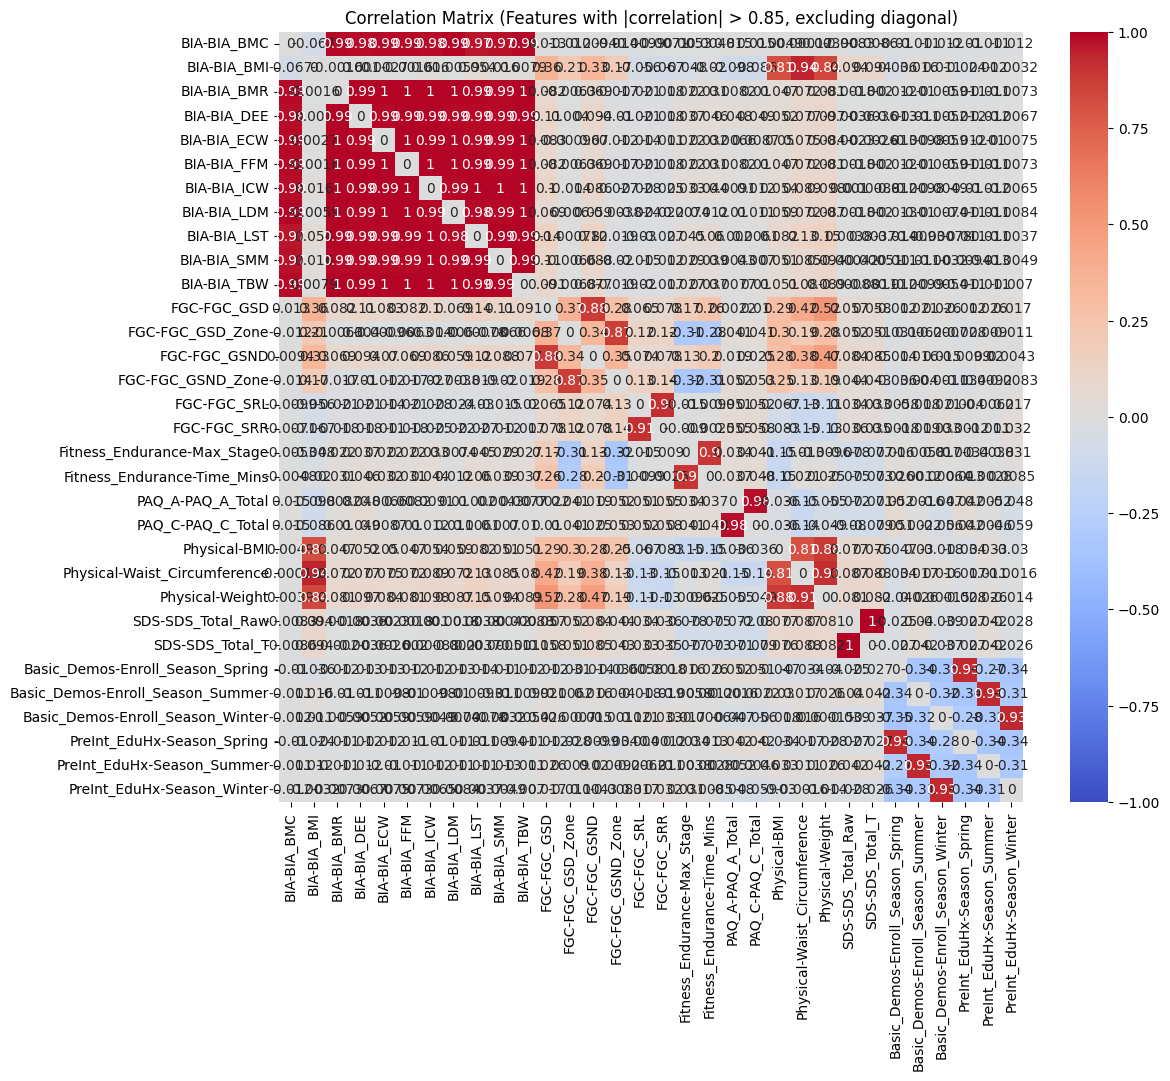

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()

threshold = 0.85

# Rimuovi la diagonale settando i valori a 0
np.fill_diagonal(corr_matrix.values, 0)

# Trova le colonne che hanno almeno una correlazione superiore alla soglia (escludendo la diagonale)
high_corr_vars = corr_matrix.columns[(corr_matrix > threshold).any()]

# Filtra la matrice di correlazione per mantenere solo le variabili altamente correlate
filtered_corr_matrix = corr_matrix.loc[high_corr_vars, high_corr_vars]

# Visualizza la matrice di correlazione filtrata
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlation Matrix (Features with |correlation| > {threshold}, excluding diagonal)")
plt.show()



Bia + Physical BMI provarle tutte e vedere la migliore
FGC-FGC_SRL, FGC-FGC_SRR prendere la media
togliere FGC-FGC_SRL_Zone
prendere SDS-SDS_Total_T ed escludere SDS-SDS_Total_Raw
Tutte le colonne PreInt_EduHx-Season le togliamo, sono colonne che indicano quando sono stati raccolti dati di interesse, ma di per sè sapere quando questi vengono raccolti non ce ne ciava un cazzo :)



In [8]:
# take all BMI columns
bmi_columns = [col for col in data.columns if 'BIA' in col and col != 'BIA-BIA_BMI' ]
data['FGC-FGC_SRM'] = (data['FGC-FGC_SRL'] + data['FGC-FGC_SRR']) / 2
data = data.drop(columns=['FGC-FGC_SRL_Zone', 'SDS-SDS_Total_Raw'])
if 'SDS-SDS_Total_Raw' in data.columns:
    data = data.drop('SDS-SDS_Total_Raw')
preint_season_column = [col for col in data.columns if 'PreInt_EduHx-Season' in col]
data = data.drop(columns=preint_season_column)

In [9]:
import pandas as pd

import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np


def calculate_vif(X):
    # Crea un DataFrame per conservare i risultati del VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns

    # Calcola il VIF per ciascuna variabile
    vif_data["VIF"] = [
        1 / (1 - LinearRegression().fit(X.drop(columns=[col]), X[col]).score(X.drop(columns=[col]), X[col]))
        for col in X.columns
    ]

    return vif_data


# Esempio di utilizzo
# vif_data = calculate_vif(data)
#print(vif_data)


## Data preparation

In [10]:
from cleaning.rfecv_selection import rfecv_selection

column_number = rfecv_selection(data)
column_number

53

In [11]:
from cleaning.rfe_selection import rfe_selection

y = data['sii']
X = data.drop(columns=['sii'])

column = rfe_selection(X, y, column_number)

data = pd.concat([X[column], y], axis=1)
column

Index(['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone',
       'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total',
       'Physical-BMI', 'Physical-Diastolic_BP', 'Physical-HeartRate',
       'Physical-Height', 'Physical-Systolic_BP',
       'Physical-Waist_Circumference', 'Physical-Weight',
       'PreInt_EduHx-computerinternet_hoursday', 'SDS-SDS_Total_T',
       'Basic_Demos-Enroll_Se

In [12]:
from cleaning.gred_search_rf import grid_search_rf

y = data['sii']
X = data.drop(columns=['sii'])

parameters = grid_search_rf(X, y)

data = pd.concat([X, y], axis=1)

parameters


Best parameters: {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5}


{'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 5}

Train Accuracy: 0.7969
Test Accuracy: 0.6054


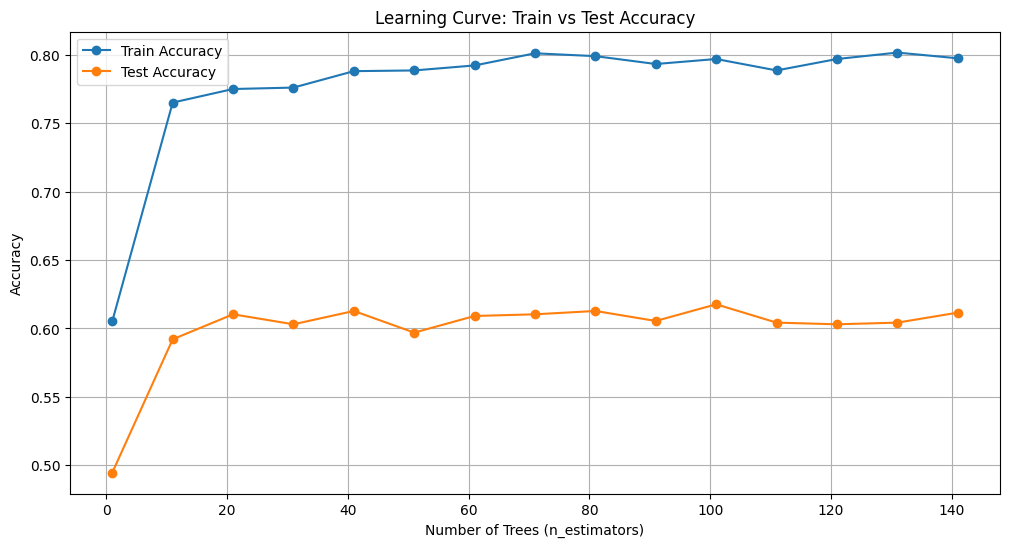

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = RandomForestClassifier(**parameters)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

n_estimators_range = range(1, 150, 10)
train_accuracies = []
test_accuracies = []

for n in n_estimators_range:
    model = RandomForestClassifier(
        max_depth=parameters['max_depth'],
        min_samples_leaf=parameters['min_samples_leaf'],
        min_samples_split=parameters['min_samples_split'],
        n_estimators=n
    )
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Grafico delle accuratezze per il numero di alberi
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Train vs Test Accuracy")
plt.legend()
plt.grid()
plt.show()


In [14]:
X_train

,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,...,PreInt_EduHx-computerinternet_hoursday,SDS-SDS_Total_T,Basic_Demos-Enroll_Season_Spring,Basic_Demos-Enroll_Season_Summer,Basic_Demos-Enroll_Season_Winter,Physical-Season_Winter,FGC-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,FGC-FGC_SRM
3103,2.90,3.426515,15.507465,1236.8398,2049.5035,20.438276,74.021272,13.442329,2.244577,9.192927,...,0.00,62.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.70175
1599,3.00,9.016140,19.223600,1133.4700,1813.5600,18.436500,62.992900,13.395500,5.828130,27.407100,...,2.00,49.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,11.00000
1561,4.00,6.119950,21.434200,1588.2800,3335.3900,37.365100,111.436000,19.740000,1.694170,9.563900,...,1.00,56.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.50000
498,4.00,4.402640,13.949900,1170.0700,2457.1400,16.669300,66.890300,14.224300,-0.274388,-1.290320,...,3.00,80.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,9.48575
1290,5.00,5.279080,17.177100,1330.4700,3193.1200,24.386400,83.975300,14.994300,2.182790,12.224700,...,2.00,68.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,2.12,4.884962,28.111449,1236.9591,1939.5753,20.518065,74.030734,16.646937,11.093167,45.294619,...,0.00,38.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.82675
134,2.09,4.731916,17.931044,1236.7858,1980.3566,19.881752,74.000011,14.029235,3.953828,22.332501,...,1.71,43.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.51925
805,2.77,3.686116,14.810022,1236.8410,2048.2615,20.619851,74.023492,13.466688,1.930615,7.244921,...,0.00,59.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.50000
2326,3.00,4.107020,14.843000,1129.8100,1920.6700,15.667300,62.602100,13.312400,1.530640,7.197900,...,1.00,41.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,9.20125


In [15]:
X_train.shape[1]

53

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping

from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Dense, Dropout
from tensorflow.keras import optimizers

# initialize the network
model = models.Sequential()

# Add the input layer and the first hidden layer

layer_number = 10

# Add the input layer and first hidden layer
model.add(
    layers.Dense(X_train.shape[1],          # Number of neurons
                 activation='relu',     # Activation function
                 input_shape=(X_train.shape[1],)         # Shape of the input data
                )
)

# Add subsequent layers
for i in range(layer_number - 1, 0, -1):  # Loop from layer_number-1 down to 1
    model.add(
        layers.Dense(256,                  # Number of neurons in each layer
                     activation='softmax' # Activation function
                    )
    )
    model.add(Dropout(0.5))

# Add the output layer
model.add(
    layers.Dense(1,                       # Single neuron for binary classification
                 activation='relu'     # Sigmoid for binary output
                )
)


# finalize the network
model.compile( optimizer=optimizers.Adam(learning_rate=0.5),
               loss='binary_crossentropy',       # loss function
               metrics=['acc'] )   # additional quality measure

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# train the network
history = model.fit( x=X_train, # training examples
           y=y_train, # desired output
           epochs=100, # number of training epochs # 50
           verbose=1,
           validation_data=(X_test, y_test),
           callbacks=[early_stopping, lr_scheduler]);

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], label='Training Accuracy', color='green')
if 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label='Validation Accuracy', color='red')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

2024-11-24 18:33:13.722190: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 18:33:13.722780: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 18:33:13.725157: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 18:33:13.729371: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732469593.735614 3901999 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732469593.73

Epoch 1/100


/home/elia/Scrivania/jupyter-docker-compose/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1732469594.649625 3901999 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - acc: 0.2807 - loss: 6.7151 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.5000
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2647 - loss: 6.7980 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.5000
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2650 - loss: 6.8151 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.5000
Epoch 4/100
48/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.2617 - loss: 6.4420
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.05.
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2624 - loss: 6.4664 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.5000
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2717 - loss: 6.4262 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.0500
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2713 - loss: 6.8624 - val_acc: 0.2655 - val_loss: 7.0682 - learning_rate: 0.0500
Epoch 7/100
48/60 ━━━━━━━━━━━━━━━━━━━━ 

##### 

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['acc'], label='Training Accuracy', color='green')
if 'val_acc' in history.history:
    plt.plot(history.history['val_acc'], label='Validation Accuracy', color='red')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
